In [1]:
from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from io import StringIO

In [2]:
def remove_non_ascii(text):
    return ''.join([word for word in text if ord(word) < 128])

In [3]:
return_string = StringIO()

In [4]:
device = TextConverter(PDFResourceManager(), return_string, codec='utf-8', laparams=LAParams())
interpreter = PDFPageInterpreter(PDFResourceManager(), device=device)
filepath = open('data/economics_textbook.pdf', 'rb')

In [5]:
for page in PDFPage.get_pages(filepath, set(), maxpages=10, caching=True, check_extractable=True):
    interpreter.process_page(page)

In [6]:
text_data = return_string.getvalue()

In [7]:
filepath.close()
device.close()
return_string.close()

In [8]:
stop_words = stopwords.words('english')
text_data_re = ' '.join([word for word in word_tokenize(remove_non_ascii(text_data)) if word not in stop_words])

In [9]:
sentences = sent_tokenize(text_data_re)

In [10]:
tokenized_sentences = list([word_tokenize(sentence) for sentence in sentences])

In [11]:
import string

In [12]:
punctuation = set(string.punctuation)

In [13]:
for i in range(0, len(tokenized_sentences)):
    tokenized_sentences[i] = [word for word in tokenized_sentences[i] if word not in punctuation]

In [15]:
from gensim.models import Word2Vec

In [57]:
skip_gram = Word2Vec(sentences=tokenized_sentences, window=3, min_count=10, sg=1)
print (skip_gram)

Word2Vec(vocab=16, size=100, alpha=0.025)


In [58]:
skip_gram.wv.vocab

{'The': <gensim.models.keyedvectors.Vocab at 0x7f46c0554c18>,
 'Saylor': <gensim.models.keyedvectors.Vocab at 0x7f46c078a898>,
 'URL': <gensim.models.keyedvectors.Vocab at 0x7f46c078a9b0>,
 'http': <gensim.models.keyedvectors.Vocab at 0x7f46c0381898>,
 '//www.saylor.org/books': <gensim.models.keyedvectors.Vocab at 0x7f46c0381eb8>,
 'Saylor.org': <gensim.models.keyedvectors.Vocab at 0x7f46c0381080>,
 'We': <gensim.models.keyedvectors.Vocab at 0x7f46c0381630>,
 'economics': <gensim.models.keyedvectors.Vocab at 0x7f46c0381e48>,
 'also': <gensim.models.keyedvectors.Vocab at 0x7f46c0381fd0>,
 'students': <gensim.models.keyedvectors.Vocab at 0x7f46c03813c8>,
 'book': <gensim.models.keyedvectors.Vocab at 0x7f46c0381f98>,
 'You': <gensim.models.keyedvectors.Vocab at 0x7f46c0381d68>,
 'food': <gensim.models.keyedvectors.Vocab at 0x7f46c0381b00>,
 'KFC': <gensim.models.keyedvectors.Vocab at 0x7f46c0511fd0>,
 'chicken': <gensim.models.keyedvectors.Vocab at 0x7f46c042f390>,
 'price': <gensim.model

In [59]:
print (dir(skip_gram.wv))

['__class__', '__contains__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_adapt_by_suffix', '_load_specials', '_log_evaluate_word_analogies', '_save_specials', '_smart_save', 'accuracy', 'add', 'closer_than', 'cosine_similarities', 'distance', 'distances', 'doesnt_match', 'evaluate_word_analogies', 'evaluate_word_pairs', 'get_keras_embedding', 'get_vector', 'index2entity', 'index2word', 'init_sims', 'load', 'load_word2vec_format', 'log_accuracy', 'log_evaluate_word_pairs', 'most_similar', 'most_similar_cosmul', 'most_similar_to_given', 'n_similarity', 'rank', 'relative_cosine_similarity', 'save', 'save_word2vec_format', 'similar_by_vector', 'similar_by_word', 'similarity',

In [60]:
skip_gram.wv.vectors.shape

(16, 100)

In [61]:
word_embedding = skip_gram[skip_gram.wv.vocab]

/home/SENSETIME/xiedongming/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [62]:
from sklearn.decomposition import PCA

In [63]:
pca = PCA(n_components=3)
_word_embedding = pca.fit_transform(word_embedding)

In [64]:
_word_embedding.shape

(16, 3)

In [65]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

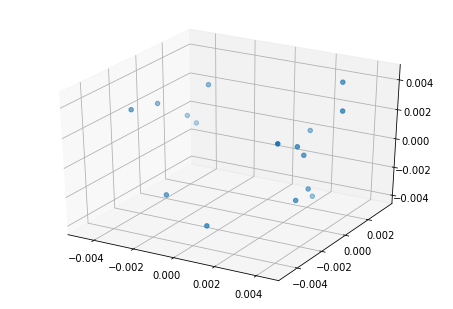

In [66]:
fig = plt.figure()
ax = Axes3D(fig)
# ax = fig.add_subplot(111, projection='3d')
ax.scatter(word_embedding[:, 0], word_embedding[:, 1], word_embedding[:, 2])

In [67]:
import numpy as np

In [68]:
def cosine_similarity(v1, v2):
    return np.dot(v1, v2)/float(euclidean_norm(v1)*euclidean_norm(v2))

In [69]:
def euclidean_norm(vector):
    return np.sqrt(np.sum([_vector**2 for _vector in vector]))

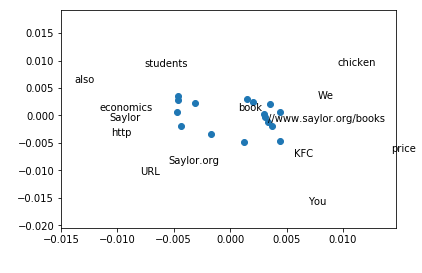

In [70]:
# fig = plt.figure()
# ax = Axes3D(fig)
plt.scatter(word_embedding[:, 0], word_embedding[:, 1])
word_list = list(skip_gram.wv.vocab)
for i, word in enumerate(word_list):
    plt.annotate(word, xy=(_word_embedding[i, 0], _word_embedding[i, 1] )) 

In [71]:
for i in range(1, len(word_list)- 1):
    print(str('Cosine distance for %s  and %s' + 
              '\n ' + 
              str(cosine_similarity(word_embedding[i, :], word_embedding[i-1, :])))%(word_list[i], word_list[i-1]))

Cosine distance for Saylor  and The
 -0.12213685137759032
Cosine distance for URL  and Saylor
 0.08113522217215434
Cosine distance for http  and URL
 0.09674798255664145
Cosine distance for //www.saylor.org/books  and http
 -0.0028442914984184906
Cosine distance for Saylor.org  and //www.saylor.org/books
 -0.033143448835797965
Cosine distance for We  and Saylor.org
 -0.023956526251875613
Cosine distance for economics  and We
 -0.041119032251034686
Cosine distance for also  and economics
 0.11449573380275103
Cosine distance for students  and also
 0.045903790366998785
Cosine distance for book  and students
 -0.07231443059375889
Cosine distance for You  and book
 0.04714836841599148
Cosine distance for food  and You
 -0.16363202467110546
Cosine distance for KFC  and food
 0.009062134384138557
Cosine distance for chicken  and KFC
 -0.17087953536349532


In [72]:
cbow = Word2Vec(sentences=tokenized_sentences, window=1, cbow_mean=0, sg=0)

In [73]:
word_embedding = cbow[cbow.wv.vocab]

/home/SENSETIME/xiedongming/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [75]:
word_embedding.shape

(55, 100)

In [76]:
pca = PCA(n_components=2)
word_embedding = pca.fit_transform(word_embedding)

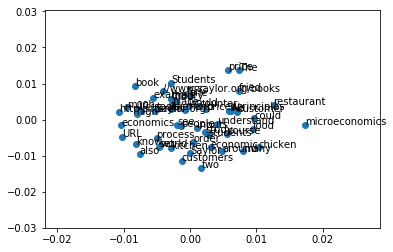

In [78]:
plt.scatter(word_embedding[:, 0], word_embedding[:, 1])
word_list = list(cbow.wv.vocab)
for i in range(len(word_embedding)):
    plt.annotate(word_list[i], xy=(word_embedding[i, 0], word_embedding[i, 1]))